In [1]:
import pandas as pd

In [6]:
usd_rates = pd.read_excel("usd_rates.xlsx")

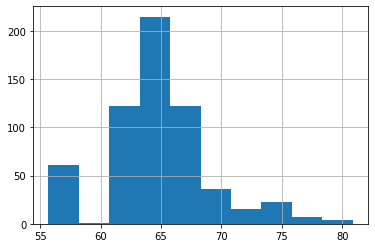

In [9]:
usd_rates.curs.hist()

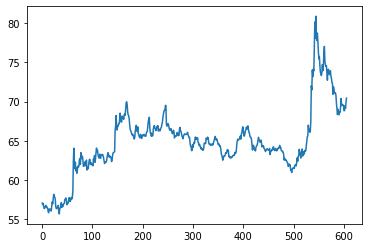

In [8]:
usd_rates.curs.plot()

In [10]:
future = 7  # Прогноз на 7 дней вперёд

In [11]:
past = 4 * 7  # Период 28 дней, который используется для прогноза

In [15]:
# DF 28 столбцов за прошлое + 7 столбцов за будующее 
# и много строк, каждая строка - один обучающий пример

In [13]:
money = usd_rates.curs

In [16]:
money[0:28]

0     57.0463
1     56.8734
2     56.9957
3     56.6019
4     56.3569
5     56.3878
6     56.5925
7     56.7597
8     56.5892
9     56.6261
10    56.4115
11    56.3888
12    55.9288
13    55.8288
14    56.2908
15    56.2914
16    56.1840
17    56.2613
18    56.0408
19    56.6278
20    57.2196
21    56.9533
22    57.6736
23    58.1718
24    58.0171
25    57.7701
26    57.5899
27    56.5918
Name: curs, dtype: float64

In [17]:
money[28:35]

28    56.3554
29    56.3438
30    56.5201
31    56.6537
32    56.7608
33    55.9208
34    55.6717
Name: curs, dtype: float64

In [21]:
money.shape

(606,)

In [26]:
start = past  # Номер дня 28 откуда начинаем собирать обучающие примеры
end = money.size - future  # Номер дня, когда заканчиваем
print(f"{start} ... {end} = {end - start}")

28 ... 599 = 571


In [31]:
training_past = []  # обучающий пример
training_future = []
for day in range(start, end):
    past_data = money[(day-past):day]  # данные за прошлое
    future_data = money[day:(day+future)]  # данные за будующее
    training_past.append(list(past_data))
    training_future.append(list(future_data))

In [53]:
# генерация названий колонок для создания DF
future_columns = []
for i in range(future):
    future_columns.append(f"future_{i}")
past_columns = []
for i in range(past):
    past_columns.append(f"past_{i}")

In [58]:
past_df = pd.DataFrame(training_past, columns=past_columns)  # Data based on
future_df = pd.DataFrame(training_future, columns=future_columns)  # Data, that we try to predict

In [62]:
# Обучающая выборка (training set) - "учебник" - без последних десяти дней
X_train = past_df[:-10]
Y_train = future_df[:-10]
# Проверочная выборка (test set) - "экзамен" - последние десять дней
X_test = past_df[-10:]
Y_test = future_df[-10:]

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
forest = RandomForestRegressor()

In [66]:
forest.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [74]:
forest.predict(X_test.head(1))

array([[69.021221, 68.777833, 68.450259, 68.469269, 68.458596, 68.647397,
        69.262831]])

In [70]:
Y_test.head(1)

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
561,68.6319,68.3123,68.6745,68.6183,69.1219,70.395,69.7524


In [71]:
forest.predict(X_test.head(1)) - Y_test.head(1)

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
561,0.389321,0.465533,-0.224241,-0.149031,-0.663304,-1.747603,-0.489569


In [72]:
from sklearn.metrics import mean_absolute_error

In [76]:
prediction = forest.predict(X_test.head(1))[0]
real = Y_test.iloc[0]  # В виде списка, а не DF

In [78]:
mean_absolute_error(prediction, real)

0.5898002857142676

In [79]:
import matplotlib.pyplot as plt

Day 7
mae = 0.6591465714285546


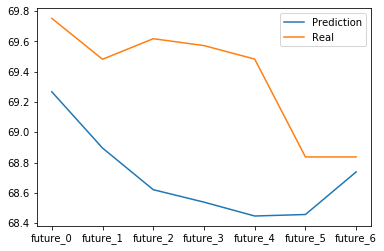

In [89]:
day = 7
print(f"Day {day}")
prediction = forest.predict([X_test.iloc[day-1]])[0]
real = Y_test.iloc[day-1]  # В виде списка, а не DF
mae = mean_absolute_error(prediction, real)
print(f"mae = {mae}")
plt.plot(prediction, label="Prediction")
plt.plot(real, label="Real")
plt.legend()
plt.show()

In [92]:
forest = RandomForestRegressor(n_estimators=1000)
forest.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Day 1
mae = 0.583411357142899


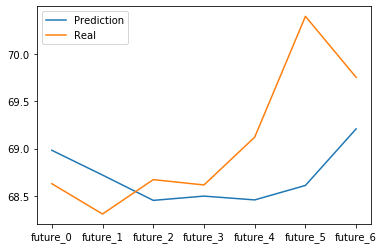

In [93]:
day = 1
print(f"Day {day}")
prediction = forest.predict([X_test.iloc[day-1]])[0]
real = Y_test.iloc[day-1]  # В виде списка, а не DF
mae = mean_absolute_error(prediction, real)
print(f"mae = {mae}")
plt.plot(prediction, label="Prediction")
plt.plot(real, label="Real")
plt.legend()
plt.show()

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

In [103]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

In [104]:
regression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Day 2 (LinearRegression)
mae = 1.2672054760612295


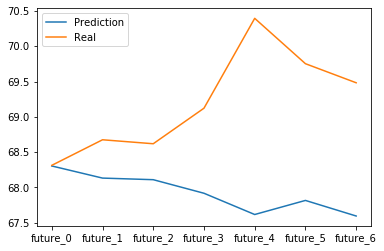

In [108]:
day = 2
print(f"Day {day} (LinearRegression)")
prediction = regression.predict([X_test.iloc[day-1]])[0]
real = Y_test.iloc[day-1]  # В виде списка, а не DF
mae = mean_absolute_error(prediction, real)
print(f"mae = {mae}")
plt.plot(prediction, label="Prediction")
plt.plot(real, label="Real")
plt.legend()
plt.show()

In [109]:
regression = LinearRegression(normalize=True)
regression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Day 1 (LinearRegression)
mae = 0.8363974173424721


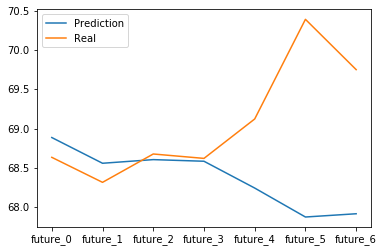

In [111]:
day = 1
print(f"Day {day} (LinearRegression)")
prediction = regression.predict([X_test.iloc[day-1]])[0]
real = Y_test.iloc[day-1]  # В виде списка, а не DF
mae = mean_absolute_error(prediction, real)
print(f"mae = {mae}")
plt.plot(prediction, label="Prediction")
plt.plot(real, label="Real")
plt.legend()
plt.show()

In [112]:
from sklearn.neural_network import MLPRegressor

In [115]:
mlp = MLPRegressor()
mlp.fit(X_train, Y_train)

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Day 1 (MLP)
mae = 0.8273335295739181


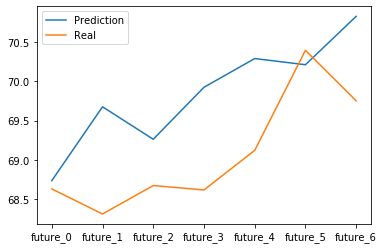

In [121]:
day = 1
print(f"Day {day} (MLP)")
prediction = mlp.predict([X_test.iloc[day-1]])[0]
real = Y_test.iloc[day-1]  # В виде списка, а не DF
mae = mean_absolute_error(prediction, real)
print(f"mae = {mae}")
plt.plot(prediction, label="Prediction")
plt.plot(real, label="Real")
plt.legend()
plt.show()

In [122]:
mlp = MLPRegressor(max_iter=2000)
mlp.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Day 1 (MLP)
mae = 1.7279660522608538


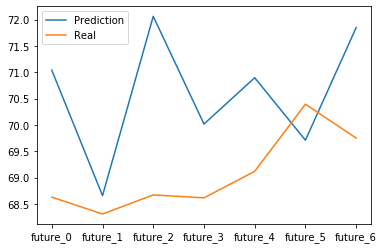

In [123]:
day = 1
print(f"Day {day} (MLP)")
prediction = mlp.predict([X_test.iloc[day-1]])[0]
real = Y_test.iloc[day-1]  # В виде списка, а не DF
mae = mean_absolute_error(prediction, real)
print(f"mae = {mae}")
plt.plot(prediction, label="Prediction")
plt.plot(real, label="Real")
plt.legend()
plt.show()

In [129]:
mlp = MLPRegressor(max_iter=2000, hidden_layer_sizes=(100,100), random_state=42)
mlp.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Day 3 (MLP)
mae = 0.4920902185287466


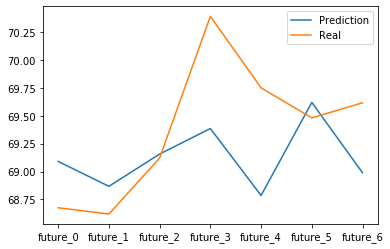

In [126]:
day = 3
print(f"Day {day} (MLP)")
prediction = mlp.predict([X_test.iloc[day-1]])[0]
real = Y_test.iloc[day-1]  # В виде списка, а не DF
mae = mean_absolute_error(prediction, real)
print(f"mae = {mae}")
plt.plot(prediction, label="Prediction")
plt.plot(real, label="Real")
plt.legend()
plt.show()

In [130]:
import pickle

In [133]:
pickle.dump(mlp, open("mpl.model", "wb")) # сохранение модели (любого объекта в файл)

In [134]:
model_mlp = pickle.load(open("mpl.model", "rb")) # загрузка модели

In [139]:
# Документация sklearn
# random_state = 42
# 1. Обучить MLPRegressor, и добиться ошибки меньше 0.8
# 2. Взять три других модели из sklearn (Regressor) и добиться низкой ошибки (< 1)

# Критерием хорошего ДЗ не является получившиеся ошибка
# Убедиться, что в ДЗ есть комментарии к коду, графики и ВЫВОДЫ

# Прислать нужно HTML файл туда, скажут в ТГ